<a href="https://colab.research.google.com/github/garthajon/QuantFinanceIntro/blob/main/itosLemma_splitbetweendrift_and_weinerprocess_inbrownianMotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

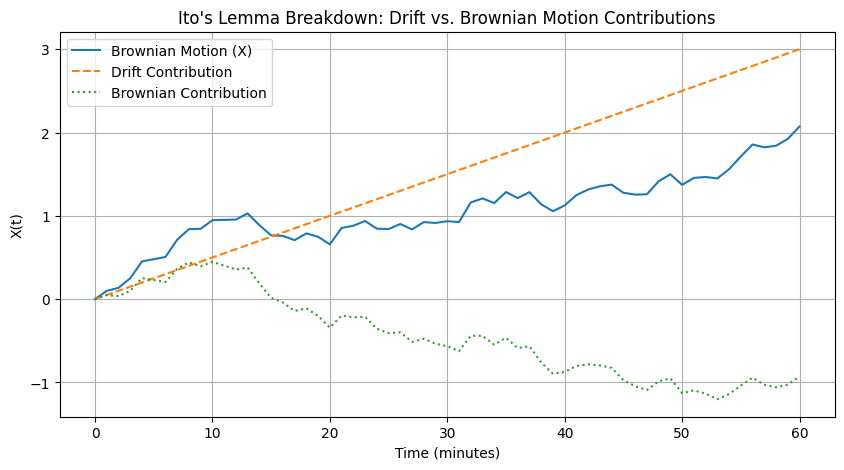

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
total_duration = 60  # Total duration in minutes
dt = 1  # Time step in minutes
n_steps = total_duration // dt  # Number of steps
mu = 0.05  # Drift term (5%)
sigma = 0.1  # Standard deviation (10%)

# Initialize variables
time = np.arange(0, total_duration + dt, dt)
X = np.zeros(len(time))  # Store Brownian motion values

drift_contrib = np.zeros(len(time))  # Contribution from drift
brownian_contrib = np.zeros(len(time))  # Contribution from Brownian motion

# Generate Brownian increments
np.random.seed(42)  # For reproducibility
dW = np.random.normal(0, np.sqrt(dt), n_steps)  # Wiener process increments

# Simulate the process
for i in range(1, len(time)):
    drift_term = mu * dt  # Contribution from drift
    brownian_term = sigma * dW[i - 1]  # Contribution from Brownian motion

    X[i] = X[i - 1] + drift_term + brownian_term
    drift_contrib[i] = drift_contrib[i - 1] + drift_term
    brownian_contrib[i] = brownian_contrib[i - 1] + brownian_term

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(time, X, label='Brownian Motion (X)')
plt.plot(time, drift_contrib, label='Drift Contribution', linestyle='dashed')
plt.plot(time, brownian_contrib, label='Brownian Contribution', linestyle='dotted')
plt.xlabel('Time (minutes)')
plt.ylabel('X(t)')
plt.legend()
plt.title("Ito's Lemma Breakdown: Drift vs. Brownian Motion Contributions")
plt.grid()
plt.show()
